# log regr

спрогнозировать вероятность выживания


# Import

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
tt = pd.read_csv('titanic_train.csv')

In [65]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**проанализируем базу данных и определим как параметры влияют на выживаемость**

<AxesSubplot:>

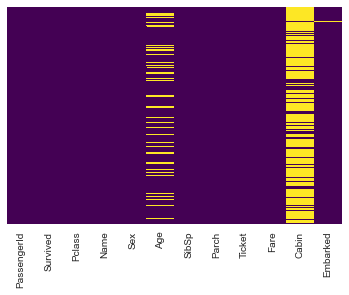

In [67]:
sns.heatmap(tt.isnull(),yticklabels=False,cbar=False,cmap='viridis')

в таблице присутствуют пропущенные значения

<AxesSubplot:xlabel='Survived', ylabel='count'>

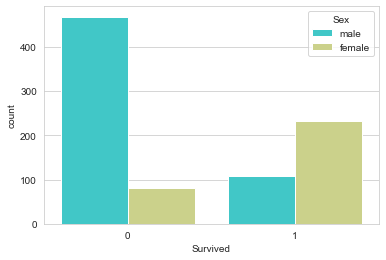

In [68]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=tt,palette='rainbow',hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

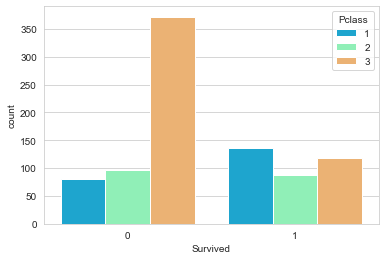

In [69]:
sns.countplot(x='Survived',data=tt,palette='rainbow',hue='Pclass')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

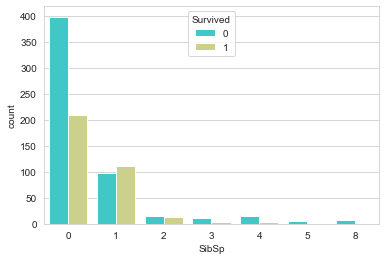

In [70]:
sns.countplot(x='SibSp',data=tt,palette='rainbow',hue='Survived')

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

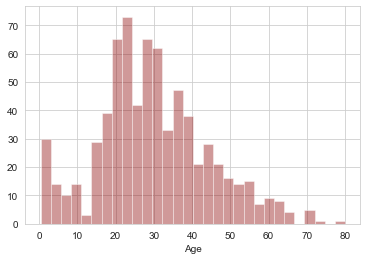

In [71]:
sns.distplot(tt['Age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

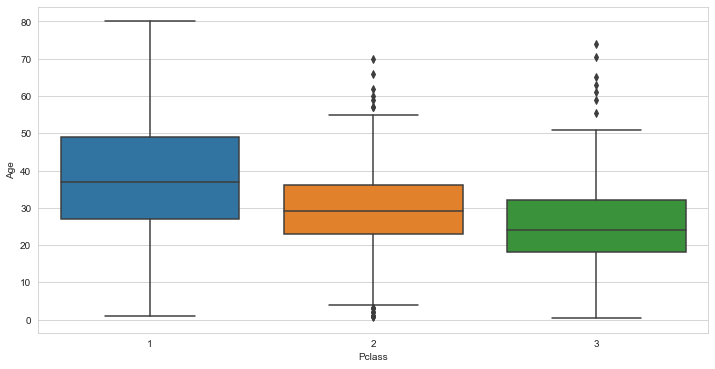

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass',y='Age',data=tt)

теперь, зная средний возраст пассажиров каждого класса можем заполнить пропущенные значения.

In [73]:
def age_clean(col):
    age=col[0]
    pclass=col[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:   
        return age   

In [74]:
tt['Age']=tt[['Age','Pclass']].apply(age_clean,axis=1)

<AxesSubplot:>

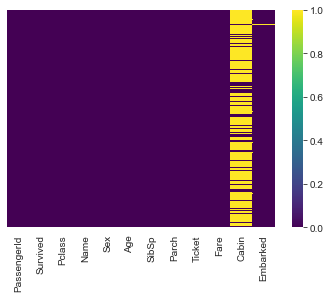

In [75]:
sns.heatmap(tt.isnull(),yticklabels=False,cbar=True,cmap='viridis')

когда пропущенных значений слишком много то легче их не учитывать вообще.

In [76]:
tt=tt.drop(['Cabin'],axis=1)

<AxesSubplot:>

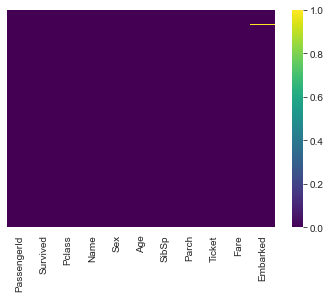

In [77]:
sns.heatmap(tt.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [78]:
tt.dropna(inplace=True)

<AxesSubplot:>

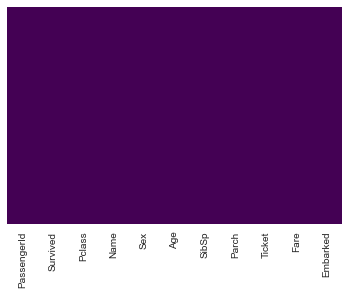

In [79]:
sns.heatmap(tt.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [80]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


параметры 'sex' и 'embarked' тоже стоит учесть так как они влияют на выживаемость как видно из диаграмм.

In [94]:
tt.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [93]:
sex = pd.get_dummies(tt['Sex'],drop_first=True)
embark = pd.get_dummies(tt['Embarked'],drop_first=True)

In [95]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [97]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [98]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [100]:
tt.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [101]:
tt=pd.concat([tt,sex,embark],axis=1)

In [103]:
tt.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## обучение, тестирование и проверка модели

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(tt.drop('Survived',axis=1), tt['Survived'], test_size=0.30, random_state=101)

In [106]:
from sklearn.linear_model import LogisticRegression

In [109]:
logmodel = LogisticRegression(max_iter=300)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [110]:
predictions = logmodel.predict(X_test)

In [111]:
from sklearn.metrics import classification_report,confusion_matrix

In [113]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[150  13]
 [ 32  72]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

